
<img src="img/logo_wiwi.png" width="25%" align="left">

<img src="img/decision_analytics_logo.png" width="17%" align="right">



<br><br><br><br><br><br><br><br>



# Algorithmen und Datenstrukturen(A+D)-Projekt 

**Sommersemester 2025**


# 2. Greedy-Varianten für das TSP

<br>

<br>
<br>

**J-Prof. Dr. Michael Römer**

Juniorprofessur für Decision Analytics  | Universität Bielefeld

In [24]:
import matplotlib.pyplot as plt
import numpy as np

## Was machen wir heute?

- wir implementieren einen Greedy-Algorithmus für das TSP (nearest neighbor)
- wir schreiben Funktionen zum Prüfen von Lösungen
- wir lösen große Instanzen und lernen ein Python-Paket für das TSP kennen
- wir implementieren eine Multi-Start-Variante
- wir lernen, wie wir diese Algorithmen stark beschleunigen können
- ggf: wir formalisieren Greedy etwas, um weitere Verbesserungen vorzubereiten
- ggf: wir betrachten das so genannte rollout



# Wiederholung aus  der Vorlesung: Greedy-Verfahren 

## Was tun, wenn für ein Optimierungsproblem kein effizienter Algorithmus bekannt ist?

- für viele NP-harte Probleme wie das das Shortest Hamiltonian Path-Problem (SHPP) und das Traveling Salesperson-Problem (TSP) sind keine effizienten Algorithmen bekannt
- was kann man tun, wenn man dennoch ein großes TSP, z.B. mit 10000 Städten lösen möchte?

#### Idee: Man gibt die Optimalitätsforderung auf!

Wenn man es nicht schafft, in kurzer Zeit eine exakte / optimale Lösung zu finden,
- kann man versuchen, in kurzer Zeit eine **gute** Lösung zu finden!
- Verfahren, die das für Optimierungsprobleme versuchen, nennt man **Heuristiken**
- ein besonders einfacher und allgemeiner Ansatz nennt sich **Greedy-Verfahren** (greedy = gierig)
 - diesen Ansatz werden wir nun näher betrachten

## Rückblick: Greedy für das Rucksackproblem

- die "naive" Variante hat nicht gut funktioniert
- die Variante mit Sortierung der Items in absteigender Reihenfolge des Quotienten aus Wert und Gewicht hat erstaunlich gut funktioniert - wir waren nicht weit vom Optimum entfernt

**Betrachten wir doch nun einmal das TSP!**

## Ein Greedy-Ansatz für das TSP / SHPP: Nearest-Neighbor

<img src="./img/32.png" width="20%" align="right">


Eine einfache und sehr bekannte Heuristik für das SHPP (und das TSP) nennt sich **nearest neighbor**:
- man startet bei einem Knoten und
- wählt in jedem Schritt immer den Knoten aus, der dem aktuellen am nächsten ist:

Beispiel rechts: wir starten in Marin und suchen immer den nächsten Nachbarn

## TSP in Python: Distanzmatrix

- die einzige Information, die wir für die Darstellung des TSP brauchen, ist eine **Distanz-Matrix**
- in dieser (symmetrischen) Matrix steht in jedem Element $[i,j]$ die Distanz zwischen den Knoten (Orten) $i$ und $j$
- als Beispiel betrachten wir folgende Matrix:


In [123]:
distance_matrix = np.array([
    [0,  5, 4, 10],
    [5,  0, 8,  5],
    [4,  8, 0,  3],
    [10, 5, 3,  0]
])

## Nearest Neighor in Python: Überblick

**Wie funktioniert der Algorithmus?**

**Eingabe:** Distanzmatrix, Startknoten

- aktueller Knoten `node` := Startknoten
- Solange noch nicht alle Knoten besucht wurden:
  - bestimme den **noch nicht besuchten** Knoten **mit kürzester Distanz** von `node`
  - füge den Knoten zur Tour (Liste der besuchten Knoten) hinzu

**Die Länge der Tour** berechnet sich dann als:
- Distanz zwischen jedem Knoten und Nachfolger in der Tour
    - wobei der Nachfolger des letzen Knotens der Startknoten ist
- diese Berechnung kann natürlich "on-the-fly" im Nearest-Neighbor-Algorithmus berechnet werden

## Hilfsfunktion: `select_nearest_neighbor`

- wir lagern die Bestimmung des nächsten Nachbarn aus in eine eigene Funktion


In [126]:
def select_nearest_neighbor(distance_matrix, tour):
    
    # node ist der letzte Knoten der tour
    node = tour[-1]
    
    smallest_distance = 9999999999 ## grosser Wert
    nearest_neighbor = 0
    
    alle_knoten = range(len(distance_matrix))
    
    #Anzahl an Knoten = Dimension der Distanzmatrix
    for neighbor in alle_knoten:
        
        if neighbor in tour: # bereits besuchte Knoten werden nicht berücksichtigt
            continue
            
        if distance_matrix[node][neighbor] < smallest_distance:
            nearest_neighbor = neighbor
            smallest_distance = distance_matrix[node][neighbor]            
       
    return nearest_neighbor, smallest_distance 

- probieren wir es aus!

In [130]:
tour = [0,2,3,1]


nearest_neighbor, smallest_distance = select_nearest_neighbor(distance_matrix, tour)

print ("nearest neighbor:", nearest_neighbor, " with distance: ", smallest_distance)

nearest neighbor: 0  with distance:  9999999999


## Implementierung des Nearest-Neighbor-Algorithmus

- beachte: der zweite Parameter ist die eine ein-elementige Liste (die den Startknoten enthält)

In [133]:
 
def tsp_nearest_neighbor(distance_matrix, tour):
    
    total_distance = 0
    
    #solange die sequenz noch nicht alle Knoten umfasst
    while len(tour) < len(distance_matrix):
        
        node, distance = select_nearest_neighbor(distance_matrix, tour)
        
        tour.append(node)
        
        total_distance += distance
        
    total_distance += distance_matrix[tour[-1], tour[0]]
    return tour, total_distance


..probieren wir es aus:

In [138]:
startknoten = 0
tour, distance = tsp_nearest_neighbor(distance_matrix, [startknoten])
print("Tour", tour, "with distance", distance)

Tour [0, 2, 3, 1] with distance 17


><div class="alert alert-block alert-info">
<b>Wie können wir diesen (Gesamt-)Algorithmus durch geschickte Wahl einer Datenstruktur verbessern?</b></div>  


## Eine Routine zum Evaluieren einer Lösung

- immer wenn man nicht-triviale Algorithmen für Optimierungsprobleme entwickelt, sollte man einen "Solution-Checker" schreiben / nutzen

><div class="alert alert-block alert-info">
<b>Was ist im Fall des TSP zu prüfen?</b></div>  


**Im Fall des TSP gilt es:**
- zu prüfen, ob
  - die Lösung die Richtige Anzahl an Knoten enthält
  - dass es sich bei der Lösung tatsächlich um eine Permutation der Indizes handelt (kein Index kommt zweimal vor)
- die Distanz der Tour zu berechnen

In [135]:
def evaluate_tsp_solution(distance_matrix, tour):
    n = len(distance_matrix)
    if len(tour) != n:
        print ("Wrong number of nodes")
        return -1
    
     # Menge der Lösungsindizes muss = der Menge der Indizes von 0 bis n-1 sein
    if set(tour) != set(range(n)):
        print ("Not a proper tour!")
        return  -1
    
    total_distance = 0
    for i in range(n):
        if i < n-1:
            total_distance += distance_matrix[tour[i],tour[i+1]]
        else:
            total_distance += distance_matrix[tour[i],tour[0]]   
            
    return total_distance    

...probieren wir es aus:

In [139]:

evaluate_tsp_solution(distance_matrix, tour)

17

## Erweiterung: Evaluation zum Überprüfen einer gegebenen Distanz

- oftmals ist es nützlich, in einer Funktion direkt die vom Algorithmus berechnete Distanz zu prüfen
- folgende Funktion macht eine entsprechende Ergebnisausgabe:


In [140]:
def print_obj_and_eval_tsp_solution(distance_matrix, tour, distance):
    
    eval_distance = evaluate_tsp_solution(distance_matrix, tour)
    
    if distance == eval_distance:
        print ("Solution feasible, distance is: ", distance)
    elif eval_distance < 0:
        print("Solution infeasible")
    else: 
        print("Solution feasible, wrong distance: ", distance, " evaluation gave ", eval_distance)

...probien wir es aus:

In [142]:
distance = 16

print_obj_and_eval_tsp_solution(distance_matrix, tour, distance)

Solution feasible, wrong distance:  16  evaluation gave  17


# Große Instanzen und das Paket `python-tsp`

## Auch hier gilt: Wir wollen weg von den "Sandkasten-Instanzen"



<img src="https://pup-assets.imgix.net/onix/images/9780691163529.jpg" width="20%" align="right">

- das TSP ist eines der bekanntesten Probleme der Informatik

- viele Ideen in der  kombinatorische Optimierung wurden zuerst für das TSP entwickelt
- **Buchtipp:**  [In Pursuit of the Traveling Salesman](https://press.princeton.edu/books/paperback/9780691163529/in-pursuit-of-the-traveling-salesman)
 - die Geschichte des TSP aus Sicht eines der Protagonisten (William Cook)
- Webseite zum TSP: https://www.math.uwaterloo.ca/tsp/index.html
- und, wie beim Rucksackproblem, **viele Probleminstanzen**
    - es gibt ganze Bibliothek von Instanzen, die so genannte [TSPLib](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/)
    - einige davon befinden sich im Repository / Zip zu diesen Folien
    - [hier](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html) finden Sie optimale Lösungswerte 

**..und sogar  ein ganzes Python-Paket: `python-tsp`** 


## Das Python-Paket `python-tsp`

siehe: https://github.com/fillipe-gsm/python-tsp

### bietet:
- Funktionen zum Einlesen von TSP-Instanzen im tsplib-format 
 - heuristische TSP-Algorithmen:
  - z.B. local search und simulated annealing
- exakte TSP-Algorithmen basierend auf Enumeration und dynamischer Programmierung
  - (vorsicht: dauert wahrscheinlich lange mit Instanzen > 10 Items)
  

#### Ein paar Hilfen:

- Installation mit `!pip install python-tsp`  (lokal und/oder in Google Colab)

**Für Colab-User:** Instanzen in Colab bekommen:


In [154]:
!pip install python-tsp
!npx degit decision-analytics/AuDProjekt2024/instances -f

Der Befehl "npx" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


## Das Python-Paket `python-tsp` testen

- TSP-Instanzen einlesen

In [171]:
from python_tsp.distances import tsplib_distance_matrix

# Lokale Installation
instances_path = "./../instances/tsp/" 

#Im Fall von Colab (oder lokal im selben Ordner wie Notebook):

#instances_path = "./tsp/" 

instance_name = "a280.tsp" # optimale Lösung 2579 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
#instance_name = "brazil58.tsp" # optimale Lösung 25395 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
#instance_name = "berlin52.tsp" # optimale Lösung 7542 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)


tsplib_file = instances_path+instance_name 

## Hilfsfunktion aus dem Paket python-tsp
distance_matrix = tsplib_distance_matrix(tsplib_file)



 - heuristische TSP-Algorithmen:

In [36]:
from python_tsp.heuristics import solve_tsp_local_search, solve_tsp_simulated_annealing

In [174]:
%%time
tour, distance = solve_tsp_simulated_annealing(distance_matrix)
distance

CPU times: total: 29.9 s
Wall time: 29.9 s


3062

- exakte TSP-Algorithmen basierend auf Enumeration und dynamischer Programmierung
  - (vorsicht: dauert wahrscheinlich lange mit Instanzen > 10 Items)
  

In [32]:
from python_tsp.exact import solve_tsp_dynamic_programming

#tour, distance = solve_tsp_dynamic_programming(distance_matrix_21)

#distance

## Wie gut ist Greedy / Nearest Neighbor?

Wie gut ist im Vergleich unser Nearest-Neigbor-Verfahren?

In [164]:
%%time

start_node = 0
tour, distance = tsp_nearest_neighbor(distance_matrix, [start_node])

print ("Distance:", distance, "Evaluated: " , evaluate_tsp_solution(distance_matrix, tour) )

Distance: 8980 Evaluated:  8980
CPU times: total: 15.6 ms
Wall time: 10.1 ms


## Erste Verbesserungsidee: Multi-Start-Greedy

- das Ergebnis der Greedy-Heuristik ist offenbar nicht sehr gut
- **aber:** die Greedy-Heuristik ist schnell - es ist nicht teuer, sie aufzurufen
  - dies kann man nutzen, um verbesserte Heuristiken "um Greedy-Vefahren herum" zu bauen

**Erste einfache Idee: Starte Greedy mit verschiedenen (allen) Startknoten** 
- die Nearest-Neighbor-Heuristik hat für unterschiedliche Startpunkte unterschiedliche Werte



In [172]:
def nearest_neighbor_multi_start(distance_matrix):
    best_distance = 999999
    best_tour = None
    for start_node in range(len(distance_matrix)):
        tour, distance = tsp_nearest_neighbor(distance_matrix, [start_node])
        if distance < best_distance:
            best_distance = distance
            best_tour = tour         

    return best_tour, best_distance  

In [173]:
%%time

tour, distance = nearest_neighbor_multi_start(distance_matrix)
print_obj_and_eval_tsp_solution(distance_matrix,tour, distance)

Solution feasible, distance is:  2975
CPU times: total: 22.4 s
Wall time: 22.4 s


# Beschleunigung durch Just-In-Time Compilation mit numba

##  Beschleunigung durch Just-In-Time Compilation mit `numba`

#### Wir sehen: Schon ein Multi-Start-Ansatz kann mehrere Sekunden dauern!

- schon bei einer Instanzgröße von 280 kann ein Multistart-Greedy eine Weile dauern
- das liegt zu erheblichen Teilen daran, dass Python eine "langsame" Sprache ist:
  - Python-Code wird während der Ausührung *interpretiert*
  - bei "schnelleren" Sprachen wird der Code vor der Ausführung *kompiliert*, d.h. in effizienten Maschinencode übersetzt

#### Hier setzt das Paket `numba` (https://numba.pydata.org/) an:

- `numba`macht eine so genannte *just-in-time compilation*, d.h. es *kompiliert* den Python-Code vor der Ausführung 
- Numba ist spezialisiert auf numpy-basierten Code und unterstützt nur einen Teil des Sprachumfangs von Python


- einfachstes Vorgehen: Einfügen des so genannten *decorators* `@njit` über der Definition einer Funktion

##  Beschleunigung durch Just-In-Time Compilation mit `numba`

**Beachte bei der Laufzeitmessung:**
- beim ersten Ausführen wird die Funktion kompiliert, daher dauert die erste Ausführung oftmals etwas länger!


**Warnung:**
- Numba kann Code zwar sehr schnell machen,
- wenn etwas nicht funktioniert, kann die die Fehlersuche aber auch sehr schwierig sein

**Wichtig:**
- wenn Sie eine Funktion mit Numba kompilieren möchten, so müssen **alle aufgerufenen Funktionen** ebenfalls mit Numba kompiliert worden sein!
   - Bsp TSP: Wenn Sie Numba für den Nearest Neighbor-Code nutzen möchten, so muss auch die `select`-Funktion mit Numba kompiliert werden


In [175]:
from numba import njit, jit
from numba.typed import List

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

## Numba für das TSP (I): select_nearest_neighbor

- wir nutzen unsere Funktionen von oben nun mit Numba
- wir lassen die Namen einfach gleich, d.h. wir "überschreiben" die alten Funktionen

In [177]:
@njit
def select_nearest_neighbor(distance_matrix, tour):
       
    smallest_distance = 9999999999 ## grosser Wert
    nearest_neighbor = 0
    node = tour[-1]
    
    
    #Anzahl an Knoten = Dimension der Distanzmatrix
    for neighbor in range(len(distance_matrix)):
        if neighbor in tour:
            continue
            
        if distance_matrix[node][neighbor] < smallest_distance:
            nearest_neighbor = neighbor
            smallest_distance = distance_matrix[node][neighbor]            
       
    return nearest_neighbor, smallest_distance 



## Numba für das TSP (II): tsp_nearest_neighbor


In [187]:
@njit
def tsp_nearest_neighbor(distance_matrix, tour):
    
    total_distance = 0
    
    #solange die sequenz noch nicht alle Knoten umfasst
    while len(tour) < len(distance_matrix):
        
        node, distance = select_nearest_neighbor(distance_matrix, tour)
        
        tour.append(node)
        total_distance += distance
        
    total_distance += distance_matrix[tour[-1]][tour[0]]
    return tour, total_distance


## Numba für das TSP (III): nearest_neighbor_multi_start


In [190]:
@njit
def nearest_neighbor_multi_start_numba(distance_matrix):
    best_distance = 999999
    best_tour = None
    for start_node in range(len(distance_matrix)):
        tour, distance = tsp_nearest_neighbor(distance_matrix, [start_node])
        if distance < best_distance:
            best_distance = distance
            best_tour = tour         

    return best_tour, best_distance  

..probieren wir es aus:

In [191]:
%%time

tour, distance = nearest_neighbor_multi_start_numba(distance_matrix)
print_obj_and_eval_tsp_solution(distance_matrix,tour, distance)

Solution feasible, distance is:  2975
CPU times: total: 1.11 s
Wall time: 1.13 s


# Greedy, etwas formalisiert

## Greedy, etwas formalisiert

Sei:
- $k$ der aktuelle Schritt (z.B. Anzahl bereits besuchter Knoten)


- $x_k$ der aktuelle Zustand (z.B. aktueller Knoten und bereits besuchte Knoten)


- $u_k$ eine Entscheidung aus der Menge $U_k(x_k)$ der im Zustand $x_k$ möglichen zulässigen Entscheidungen 
  - z.B. eine möglicher noch nicht besuchter Knoten
  
  
- $g(x_k, u_k)$ Kosten / Gewinnbeitrag der Entscheidung $u_k$ im Zustand $x_k$
  - z.B. die Distanz zum nächsten Knoten
  
  
- $f(x_k, u_k)$ der Folgezustand, der aus $x_k$ und der Entscheidung $u_k$ resultiert (eine Zustandstransition)
  - z.B. die erweiterte Menge der besuchten Knoten und der Zielknoten
  

**Bei Greedy** 
- basiert die Entscheidung in der Regel nur auf den (kurzfristigen) Kosten $g(x_k, u_k)$
  - z.B. beim nearest neighbor: $$\min_{u_k \in U_k} g(x_k, u_k)$$ 

## Visualisierung: Folge von Zuständen auf Basis von Greedy

- in jeder Iteration / auf jeder Stufe wird die Entscheidung lediglich auf Basis von $g(x_k, u_k)$ getroffen

<img src="./img/single_trajectory.png" width="80%">

Quelle: Dimitri P. Bertsekas: Lessons from AlphaZero

## Greedy ist kurzsichtig

Ein **Hauptproblem** von Greedy (hier: nearest neighbor) ist folgendes:

- die Auswahl der nächsten Entscheidung (hier: des nächsten Knotens) erfolgt sehr **kurzsichtig**:
  - es wird lediglich die Greedy-Funktion (hier: die Distanz zum nächsten Knoten) betrachtet
- d.h.: die **Auswirkung der Entscheidung auf zukünftige Entscheidungen** wird komplett ignoriert
  - bei nearest neighbor: es kann z.B. sein, dass der letzte Knoten **sehr** weit vom Startknoten entfernt ist
  
  

## Visualisierung: Der Baum bei der Suche nach einer optimalen Entscheidung


<img src="./img/full_tree.png" width="80%">

Quelle: Dimitri P. Bertsekas: Lessons from AlphaZero

## Der (zukünftige) Wert einer Entscheidung (besser: eines Zustands)

- in einem bestimmten Schritt eines Algorithmus zur Lösungskonstruktion befinden wir uns in einem **Zustand**
  - z.B.: derzeitiger Knoten und bisher besuchte Knoten im TSP
  
- der (zukünftige) **Wert** (auch: **cost to go**) dieses Zustands ist der Zielfunktionswert des verbleibenden Problems ab diesem Zustand
  - z.B. der Gesamtdistanz der **optimalen** Rest-Tour vom derzeitigen Zustand im TSP

**Formal:** bezeichnen wir diesen Wert als $J(x_k)$

...wenn wir die exakte  Wertfunktion $J(x_k)$ für jedes $x_k$ kennen, so können wir die optimale Lösung bestimmen!

## Die optimale Entscheidung

**Wenn wir diesen Wert kennen**, können wir eine optimale Entscheidung treffen:

- wähle die Entscheidung (den nächsten Knoten), für die (den) 
    - der Beitrag der einzelnen Entscheidung (Distanz zum Knoten) **+** 
    - der Wert des resultierenden Zustands 
- optimal ist

...wenn wir das in jedem Schritt machen, finden wir eine optimale Lösung
  

**Formal:** wir wählen $u_k$ nach folgender Regel:


$$\min_{u_k \in U_k} \Big( g(x_k, u_k) + J\big( f(x_k, u_k )\big)  \Big)$$ 

...dabei ist $J\big( f(x_k, u_k )\big) = J\big(x_{k+1}\big)$ der Wert des nächsten Zustands $x_{k+1} = f(x_k,u_k)$, der aus der Entscheidung resultiert

  
**Das Problem:**

- um den Wert (die cost to go) eines Zustands zu berechnen, müssen wir das ganze Problem optimal lösen!
- das ist bei NP-harten Problem allerdings zu aufwendig...

  

## Zwischen Greedy und Durchsuchen aller Zustände: Rollout

- wir können zwar $J\big( x_k \big)$  in der Regel **nicht exakt** berechnen
- **ABER**: wir können versuchen, $J\big( x_k \big)$ zu approximieren 
  - die approximative Wertfunktion wird $\tilde{J}\big( x_k \big)$ 
  
Man kann das 
- **offline** machen, in dem man mit Hilfe von Machine Learning die Wertfunktion approximiert
- oder **online**, indem man z.B. eine Greedy-Heuristik von $x_k$ bis zum Ende laufen lässt
  - dieses Vorgehen nennt man **Rollout** mit einer **base heuristic**, wir schreiben dann ggf. $H(x_k)$ statt $\tilde{J}\big( x_k \big)$ , um zu kennzeichnen, dass wir eine Heuristik nutzen

## Rollout für TSP: Visualisierung 

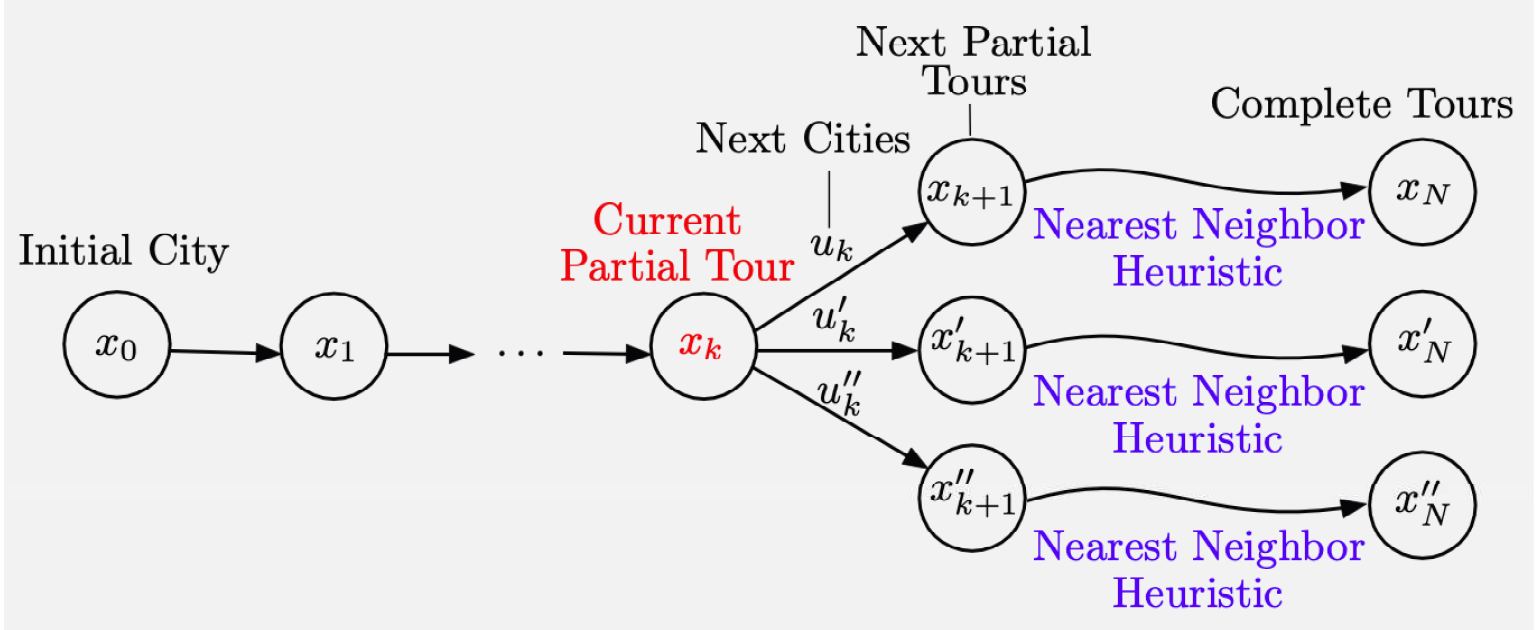


Quelle: Dimitri P. Bertsekas: Lessons from AlphaZero

## Rollout für das TSP

**Greedy:**
- wähle immer den nächsten Nachbarn (den Nachbarn mit der kürzesten Distanz)

**Rollout mit Greedy:**
- lasse von jedem Nachbarn aus Greedy laufen
- wähle den Nachbarn, der die **Summe aus Distanz zum Nachbarn und Greedy-Distanz vom Nachbarn bis zum Ende** minimiert

- Formal: 

$$\min_{u_k \in U_k} \Big( g(x_k, u_k) + \tilde{J}\big( f(x_k, u_k )\big)  \Big)$$ 

wobei:
- $U_k$ die Menge der noch nicht besuchten Knoten ist
- $g(x_k, u_k)$ die Distanz vom aktuellen Knoten zum möglichen Nachfolger $u_k$
- $\tilde{J}\big( f(x_k, u_k )\big)$ das Ergebnis der Greedy-Heuristik von $u_k$ aus

## Fazit


#### Heute haben wir
- das TSP betrachtet und nearest neihgbor als Beispiel für ein Greedy-Verfahren implementiert
- Routinen zum Chekcen von Lösungen entwickelt
- Multi-Start-Verfahren kennengelernt und ausprobiert
- Vergleiche mit einem Python-Paket für das TSP durchgeführt
- gesehen, wie wir mit numba unseren Code drastisch beschleunigen können
- den Greedy-Ansatz etwas formalisiert, um weitere Verfahren vorzubereiten

#### Beim nächsten Mal werden
- das Thema Rollout vertiefen und...


#### jetzt die Gruppen bilden






# Organisatorisches: Projektthemen und -gruppen





## Wiederholung: Ziele des Kurses

Im Kurs 
- vertiefen Sie Ihre Kenntnisse aus der Vorlesung und wenden diese auf eine konkrete Fragestellung an
- sammeln Sie vertiefte Erfahrungen mit der praktischen Implementierung 
- üben Sie, im Team zu arbeiten
- lernen Sie, mit Varianten von Algorithmen zu experimentieren, um
  - Algorithmen weiterzuentwickeln
  - eine geeignete Variante auszuwählen
- lernen Sie **grundlegende Prinzipien und Denkweisen der (approximativen) dynamischen Programmierung** kennen, die die Grundlage für **fortgeschrittene Methoden**, z.B. des *Reinforcement Learning* bilden




## Wiederholung: Lernformate

In **Präsenzveranstaltungen** (erste zwei Wochen: hybrid) werden Inhalte vermittelt, die für das Projekt relevant sind: 
- anhand von Beispielen werden algorithmische Prinzipien erläutert, die im Projekt angewendet und verfeinert werden können
- erweiterte Techniken und Pakete in Python, die nützlich sein können
- Einlesen von Probleminstanzen und Experimenieren mit Algorithmen
- ggf. Tools zum gemeinsamen Entwickeln von Code


In **Projektarbeiten** 
- arbeiten Sie in Gruppen von idealerweise **3-4 Personen** gemeinsam an der Entwicklung und Implementierung
- an einem Problem der **kombinatorischen Optimierung**
- jede Gruppe wird **von einem Dozenten** betreut, mit dem regelmäßige Treffen vereinbart werden sollten

In **zwei Präsentationen je Gruppe** werden
- Zwischenergebnisse und Abschlussergebnisse vorgestellt

In einem **gemeinsamen Projektbericht** werden
- die Projektergebnisse aufbereitet und
- wissenschaftliches Schreiben geübt



## Die Projekte

**Es gibt zwei verschiedene Projektthemen:**
- Bin Packing with Conflicts
- Graph Clear Problem

**Jedes Projektthema** 
- ist ein kombinatorisches Optimierungsproblem
- für das es relativ einfache Greedy-Ansätze gibt,
- die die Basis für einen im Projekt zu entwickelnden Algorithmus, z.B. auf Basis einer Baumsuche, bildet
  - Sie können auch andere Ansätze nutzen, wenn Sie mögen!



**Die Bearbeitung**
- erfolgt in Kleingruppen von 3-4 Personen
- dabei können Themen auch doppelt vergeben werden
- wir würden, wenn möglich, die Projektgruppen gern schon heute bilden







## Thema 1: Bin Packing with Conflicts

Im **Bin Packing Problem** (deutsch: **Behälterproblem**) sind gegeben:
- eine gegebene Menge $I$ an Gegenständen (*items*) mit verschiedenen Gewichten $w_i$ je $i \in I$
- ein Behältertyp (*bin*) mit einer Kapazität (maximales Gewicht je Behälter) $b$ 

**Ziel** ist es, **alle** Gegenstände in eine **möglichst geringe** Anzahl von Behältern zu packen


Im **Bin Packing Problem with Conflicts** gibt es zusätzlich die Bedingung, dass bestimmte Gegenstände nicht in den selben Behälter gepackt werden dürfen.

#### Beispiel:


#### Beispiel:

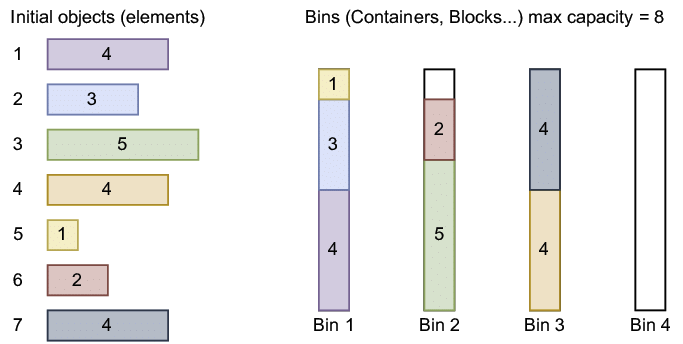


Wenn in diesem Beispiel ein Konflikt zwischen Item 3 und Item 6 bestehen würde, so wäre die gezeigte Lösung unzulässig

Quelle: Chabri et al. (2022) DOI: 10.11591/ijece.v12i3.pp3226-3237

## Thema 1: Bin Packing with Conflicts - Instanzen und Lösungen

- Instanzen: https://site.unibo.it/operations-research/en/research/library-of-codes-and-instances-1/bppc.zip/@@download/file/BPPC.zip

- optimale Lösungen: https://research.fdabrandao.pt/research/vpsolver/results/BPPC.html#BPPC (Spalte: ZIP)



## Thema 2: Graph Clear Problem

**Gegeben:** Ein als Graph $G$ repräsentierter Gebäudeplan, in dem 
- jeder Knoten einen Raum repräsentiert und
- Kanten Durchgänge von Raum zu Raum entsprechen.

Die Räume sollen von Eindringlingen (z.B. Ungeziefer) mit Hilfe von Robotern befreit werden.

In jedem Zeitschritt, kann **ein** Knoten $i$ gereinigt werden, dazu braucht man $a_i$ Roboter (je nach Knoten verschieden). Zudem kann man Durchgänge blockieren, für jeden zu blockierenden Durchgang braucht man $b_{ij}$ Roboter.

Ein Raum wird innerhalb eines Zeitschritts re-kontaminiert, wenn es einen nicht-blockierten Weg zwischen dem Raum und einem noch kontaminierten Raum gibt.

Am Anfang sind alle Räume kontaminiert. 


**Gesucht**: Die minimale Anzahl an Robotern, mit in einer Abfolge von zu reinigenden Knoten / Sperrungen gebildet werden kann, so dass das komplette Gebäude von Ungeziefer befreit ist. 

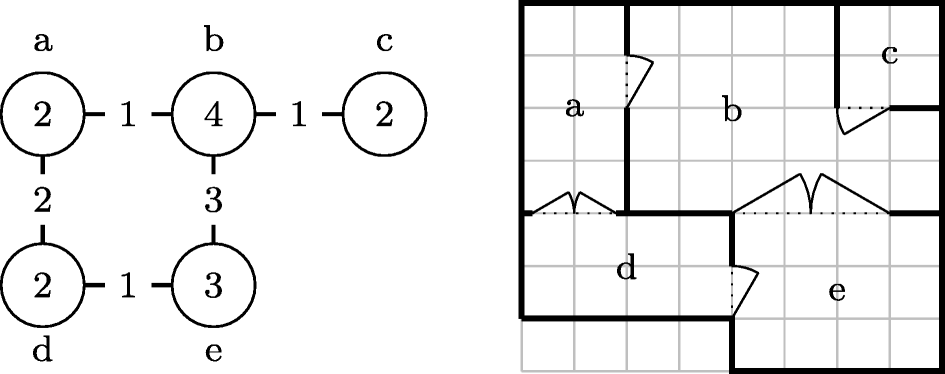

Morin, M., Castro, M.P., Booth, K.E.C. et al. Intruder alert! Optimization models for solving the mobile robot graph-clear problem. Constraints 23, 335–354 (2018). https://doi.org/10.1007/s10601-018-9288-3

## Thema 2: Graph Clear Problem

**Beobachtungen:**:
- Es gibt einen optimalen "Reinigungsplan", bei dem ein einmal befreiter Raum nie wieder gereinigt werden muss
- In jedem Zeitschritt lässt eine Anzahl an Robotern finden mit der alle nötigen Durchgänge blockiert werden, ohne dass eine Rekontaminierung verhinert wird

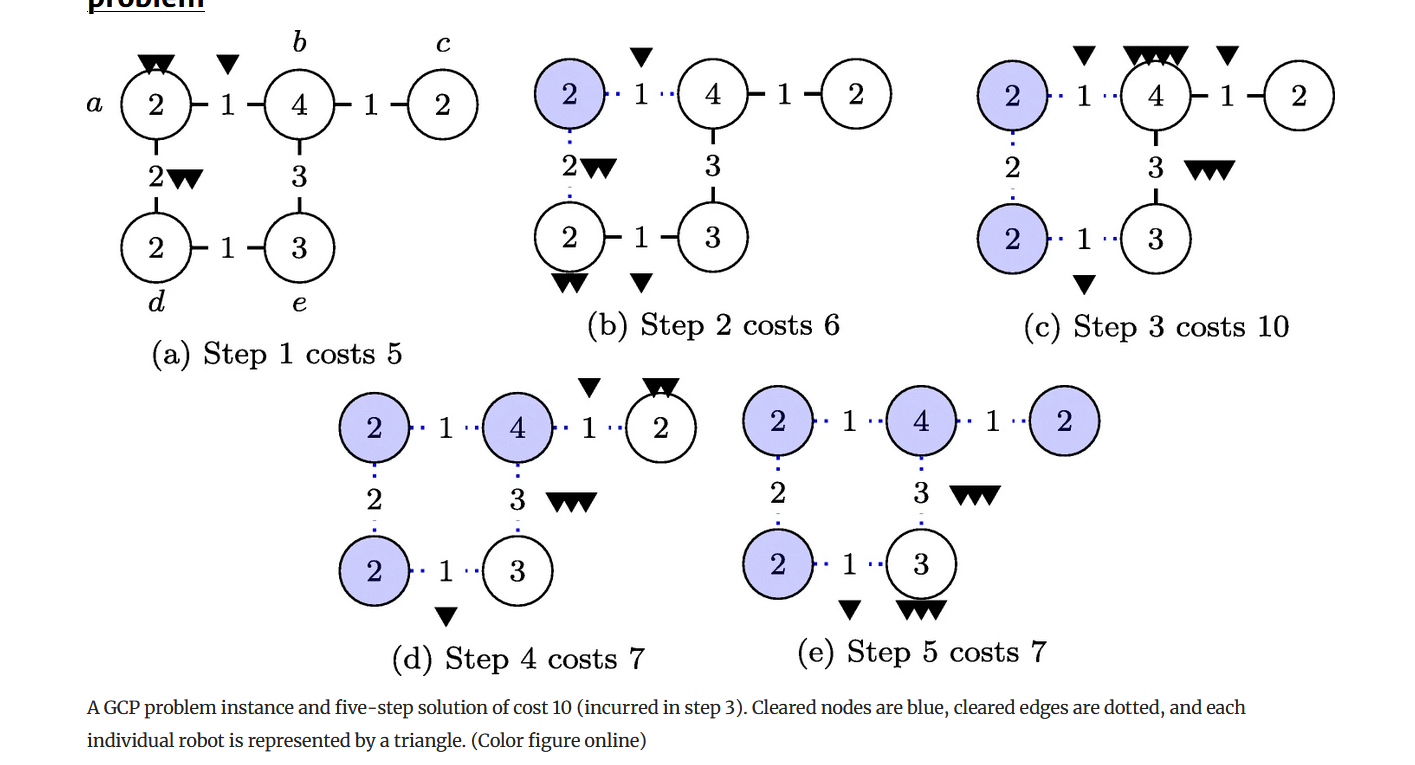
Morin, M., Castro, M.P., Booth, K.E.C. et al. Intruder alert! Optimization models for solving the mobile robot graph-clear problem. Constraints 23, 335–354 (2018). https://doi.org/10.1007/s10601-018-9288-3

#### Instanzen
- Probleminstanzen: https://github.com/Kurorororo/didp-models/tree/main/graph-clear

## Gruppen- und Themenzuordnung

|Gruppe | Thema | Gruppenmitglieder 
|-|:-|:-|
|1| Bin Packing with Conflicts | 
|2| Graph Clear | 


